Qualitative
Quantitative

Qualitative scales:
Nominal (Categories)
Ordinal (Order, rank)
Interval (eg °C)
Ratio (eg distance)

Causal relationships
Cause: independent variable
Consequence: dependent variable

Population
Sample

In [3]:
# Importing the necessary packages
import os.path

import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system

import os

In [4]:
titanic = pd.read_csv(os.path.join("data","titanic.csv"))
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(f"Number of rows: {len(titanic)}")
print(f"number of columns: {len(titanic.columns)}")
print(f"shape of dataframe: {titanic.shape}")
titanic.info()

Number of rows: 891
number of columns: 12
shape of dataframe: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
print(titanic.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [10]:
print(titanic.dtypes.value_counts())

int64      5
object     5
float64    2
dtype: int64


In [11]:
#mark column as index
titanic.set_index(['PassengerId'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [15]:
titanic.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [17]:
# set columns as qualitative
titanic.Survived = titanic.Survived.astype('category')
titanic.Survived.describe()

count     891
unique      2
top         0
freq      549
Name: Survived, dtype: int64

In [18]:
# mark as ordinal
print(titanic.Embarked.unique())

['S' 'C' 'Q' nan]


In [19]:
embarked_type = CategoricalDtype(categories=['S','C','Q'],ordered=True)
titanic.Embarked = titanic.Embarked.astype(embarked_type)
titanic.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

<AxesSubplot:xlabel='Embarked', ylabel='count'>

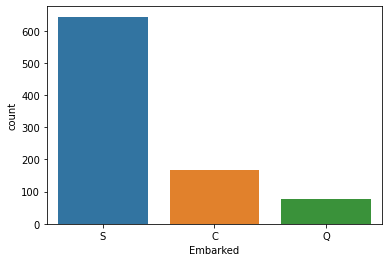

In [22]:
# plot
sns.countplot(data=titanic,x='Embarked')

In [23]:
# Select Data
print(titanic.Age)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [24]:
print(titanic['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [26]:
print(titanic.loc[:,'Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [27]:
# 2de en 3de kolom:
titanic.iloc[:,2:4]

,Pclass,Name
0,3,"Braund, Mr. Owen Harris"
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,"Heikkinen, Miss. Laina"
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,3,"Allen, Mr. William Henry"
...,...,...
886,2,"Montvila, Rev. Juozas"
887,1,"Graham, Miss. Margaret Edith"
888,3,"Johnston, Miss. Catherine Helen ""Carrie"""
889,1,"Behr, Mr. Karl Howell"


In [29]:
# based on names
titanic[['Name', 'Age', 'Cabin']]

,Name,Age,Cabin
0,"Braund, Mr. Owen Harris",22.0,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,C85
2,"Heikkinen, Miss. Laina",26.0,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,C123
4,"Allen, Mr. William Henry",35.0,NaN
...,...,...,...
886,"Montvila, Rev. Juozas",27.0,NaN
887,"Graham, Miss. Margaret Edith",19.0,B42
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,NaN
889,"Behr, Mr. Karl Howell",26.0,C148


In [30]:
# select based on the value
titanic[titanic.Age < 18]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [31]:
titanic[titanic.Age < 18][['Age','Embarked']]

,Age,Embarked
7,2.0,S
9,14.0,C
10,4.0,S
14,14.0,S
16,2.0,Q
...,...,...
850,4.0,S
852,9.0,C
853,16.0,S
869,4.0,S


In [36]:
# querying
titanic.query("(Age < 18) and (Sex == 'male')")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.00,1,3,W./C. 6608,34.3750,NaN,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.00,0,0,7534,9.2167,NaN,S
163,164,0,3,"Calic, Mr. Jovo",male,17.00,0,0,315093,8.6625,NaN,S


In [37]:
# dropping data and working with missing data
titanic = pd.read_csv(os.path.join("data","titanic.csv"))
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
# drop a column
titanic.drop("PassengerId", axis="columns", inplace=True)

In [40]:
# check for missing values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [41]:
titanic.dropna(inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Name      183 non-null    object 
 3   Sex       183 non-null    object 
 4   Age       183 non-null    float64
 5   SibSp     183 non-null    int64  
 6   Parch     183 non-null    int64  
 7   Ticket    183 non-null    object 
 8   Fare      183 non-null    float64
 9   Cabin     183 non-null    object 
 10  Embarked  183 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 17.2+ KB


In [42]:
# boolean for not null
not_null_df = titanic.notnull()
print(not_null_df.tail(3))

     Survived  Pclass  Name   Sex   Age  SibSp  Parch  Ticket  Fare  Cabin  \
879      True    True  True  True  True   True   True    True  True   True   
887      True    True  True  True  True   True   True    True  True   True   
889      True    True  True  True  True   True   True    True  True   True   

     Embarked  
879      True  
887      True  
889      True  


In [43]:
print("Number of non null values in each column:")
print(not_null_df.sum())

Number of non null values in each column:
Survived    183
Pclass      183
Name        183
Sex         183
Age         183
SibSp       183
Parch       183
Ticket      183
Fare        183
Cabin       183
Embarked    183
dtype: int64


In [44]:
# number of instances
print(titanic.count())

Survived    183
Pclass      183
Name        183
Sex         183
Age         183
SibSp       183
Parch       183
Ticket      183
Fare        183
Cabin       183
Embarked    183
dtype: int64


In [47]:
# impute missing values
avg_age = titanic.Age.mean()
print(f"(Rounded) Average age of passengers: {round(avg_age)}")
titanic = titanic.fillna(value={'Age' : avg_age})
titanic.info()

(Rounded) Average age of passengers: 36
<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  183 non-null    int64  
 1   Pclass    183 non-null    int64  
 2   Name      183 non-null    object 
 3   Sex       183 non-null    object 
 4   Age       183 non-null    float64
 5   SibSp     183 non-null    int64  
 6   Parch     183 non-null    int64  
 7   Ticket    183 non-null    object 
 8   Fare      183 non-null    float64
 9   Cabin     183 non-null    object 
 10  Embarked  183 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 17.2+ KB


In [48]:
# creating new columns
URL = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2.csv"
air_quality = pd.read_csv(URL)
print(air_quality.info())
air_quality.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         1035 non-null   object 
 1   station_antwerp  95 non-null     float64
 2   station_paris    1004 non-null   float64
 3   station_london   969 non-null    float64
dtypes: float64(3), object(1)
memory usage: 32.5+ KB
None


,datetime,station_antwerp,station_paris,station_london
0,2019-05-07 02:00:00,NaN,NaN,23.0
1,2019-05-07 03:00:00,50.5,25.0,19.0
2,2019-05-07 04:00:00,45.0,27.7,19.0
3,2019-05-07 05:00:00,NaN,50.4,16.0
4,2019-05-07 06:00:00,NaN,61.9,NaN


In [49]:
air_quality = pd.read_csv(URL, index_col=0, parse_dates=True)
print(air_quality.info())
air_quality.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1035 entries, 2019-05-07 02:00:00 to 2019-06-21 02:00:00
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station_antwerp  95 non-null     float64
 1   station_paris    1004 non-null   float64
 2   station_london   969 non-null    float64
dtypes: float64(3)
memory usage: 32.3 KB
None


,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


In [50]:
# add a column
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN


In [52]:
# numerically encode a column
titanic['Sex'].unique()

array(['female', 'male'], dtype=object)

In [53]:
mapping_dict = {'male' : 0, 'female' : 1}
titanic['Sex'] = titanic['Sex'].map(mapping_dict)

In [55]:
# define a function
def age_to_category(age):
    if age < 12:
        return "child"
    if age < 18:
        return  "teen"
    return "adult"

titanic['AgeCategory'] = titanic['Age'].map(age_to_category)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,adult
6,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,adult
10,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S,child
11,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S,adult
